<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [49]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [50]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-02-24 22:33:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-02-24 22:33:14 (16.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [51]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [52]:
df.shape

(346, 10)

### Convert to date time object


In [53]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [54]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [55]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py38_0         160 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         503 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2021.10.8-py38h5~ --> anaconda::certifi-2020.6.20-py38_0
  seaborn            pkgs/main::seaborn-0.11.1-pyhd3eb1b0_0 --> anaconda::seabor

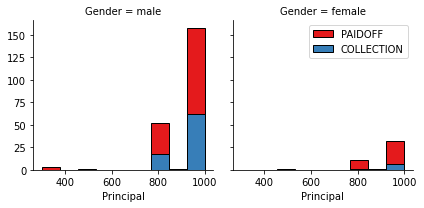

In [56]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

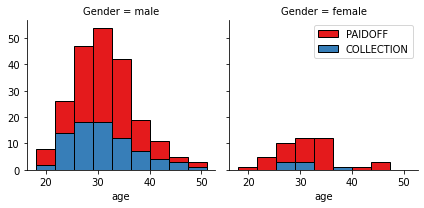

In [57]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


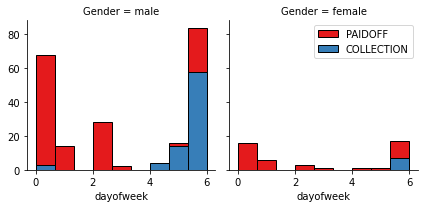

In [58]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [59]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [60]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [61]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [62]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [63]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [64]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [65]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [66]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [67]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [68]:
#Import the ScikitLearn Library for KNN regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('The size of the training dataset', X_train.shape, y_train.shape)
print('The size of the test dataset', X_test.shape, y_test.shape)

The size of the training dataset (276, 8) (276,)
The size of the test dataset (70, 8) (70,)


In [69]:
#Classification using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Training
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc 



array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       ])

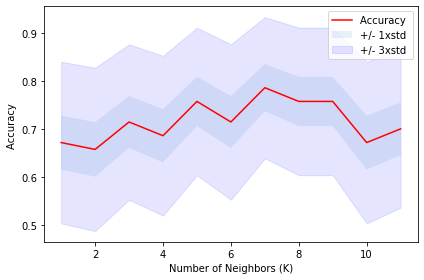

The best accuracy is with 0.7857142857142857 with k= 7


In [70]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy is with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


In [71]:
#Calculate the accuracy of the model using the Test set
k=6
#Train the model
menard = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
menard

yhat1 = menard.predict(X_test)
yhat1[0:5]

print("Train set Accuracy: ", metrics.accuracy_score(y_train, menard.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.8007246376811594
Test set Accuracy:  0.7142857142857143


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat1))


              precision    recall  f1-score   support

  COLLECTION       0.37      0.47      0.41        15
     PAIDOFF       0.84      0.78      0.81        55

    accuracy                           0.71        70
   macro avg       0.61      0.62      0.61        70
weighted avg       0.74      0.71      0.73        70



In [73]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat1, average='weighted')


0.7257016013952751

In [74]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat1, average='weighted')

0.5918367346938774

# Decision Tree


In [75]:
from sklearn.tree import DecisionTreeClassifier

st = 11

mean_acc = np.zeros((st-1))
std_acc = np.zeros((st-1))
ConfustionMx = [];
for n in range(1,st):
    
    #Train Model and Predict  
    stan = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat = stan.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ])

<function matplotlib.pyplot.show(close=None, block=None)>

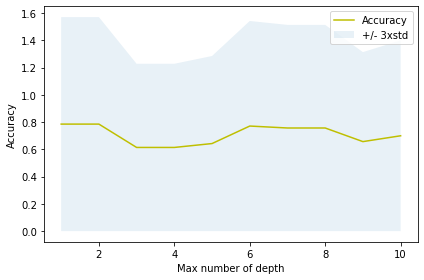

In [76]:
plt.plot(range(1,st), mean_acc, 'y')
plt.fill_between(range(1,st), mean_acc - 1*std_acc + mean_acc + 1*std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.xlabel('Max number of depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show

In [77]:
#Building the decision Tree with max depth 8
core = DecisionTreeClassifier(criterion='entropy', max_depth = 8)

core.fit(X_train, y_train)

yhat3 = core.predict(X_test)

In [78]:
#Calculate the Train and Test accuracy

print("Train set Accuracy: ", metrics.accuracy_score(y_train, core.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))
#Building the confusion matrix for our model
print (classification_report(y_test, yhat3))

Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.7571428571428571
              precision    recall  f1-score   support

  COLLECTION       0.25      0.07      0.11        15
     PAIDOFF       0.79      0.95      0.86        55

    accuracy                           0.76        70
   macro avg       0.52      0.51      0.48        70
weighted avg       0.67      0.76      0.70        70



In [79]:
#Calclulate the f1 score
f1_score(y_test, yhat3, average='weighted')

0.6978810663021189

In [80]:
#Calculation of the jaccard index
jaccard_score(y_test, yhat3, average='weighted')

0.6040372670807455

In [81]:
# Visualizing the Decision Tree
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyh243d235_4          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2021.10.8-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py38_0 --> conda-forge::certifi-2021.10.8-py38h578d9bd_1
  pydotplus                                      2.0.2-py_1 --> 2.0.2-pyh243d235_4



pydotplus-2.0.2      | 24 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing tr

In [82]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

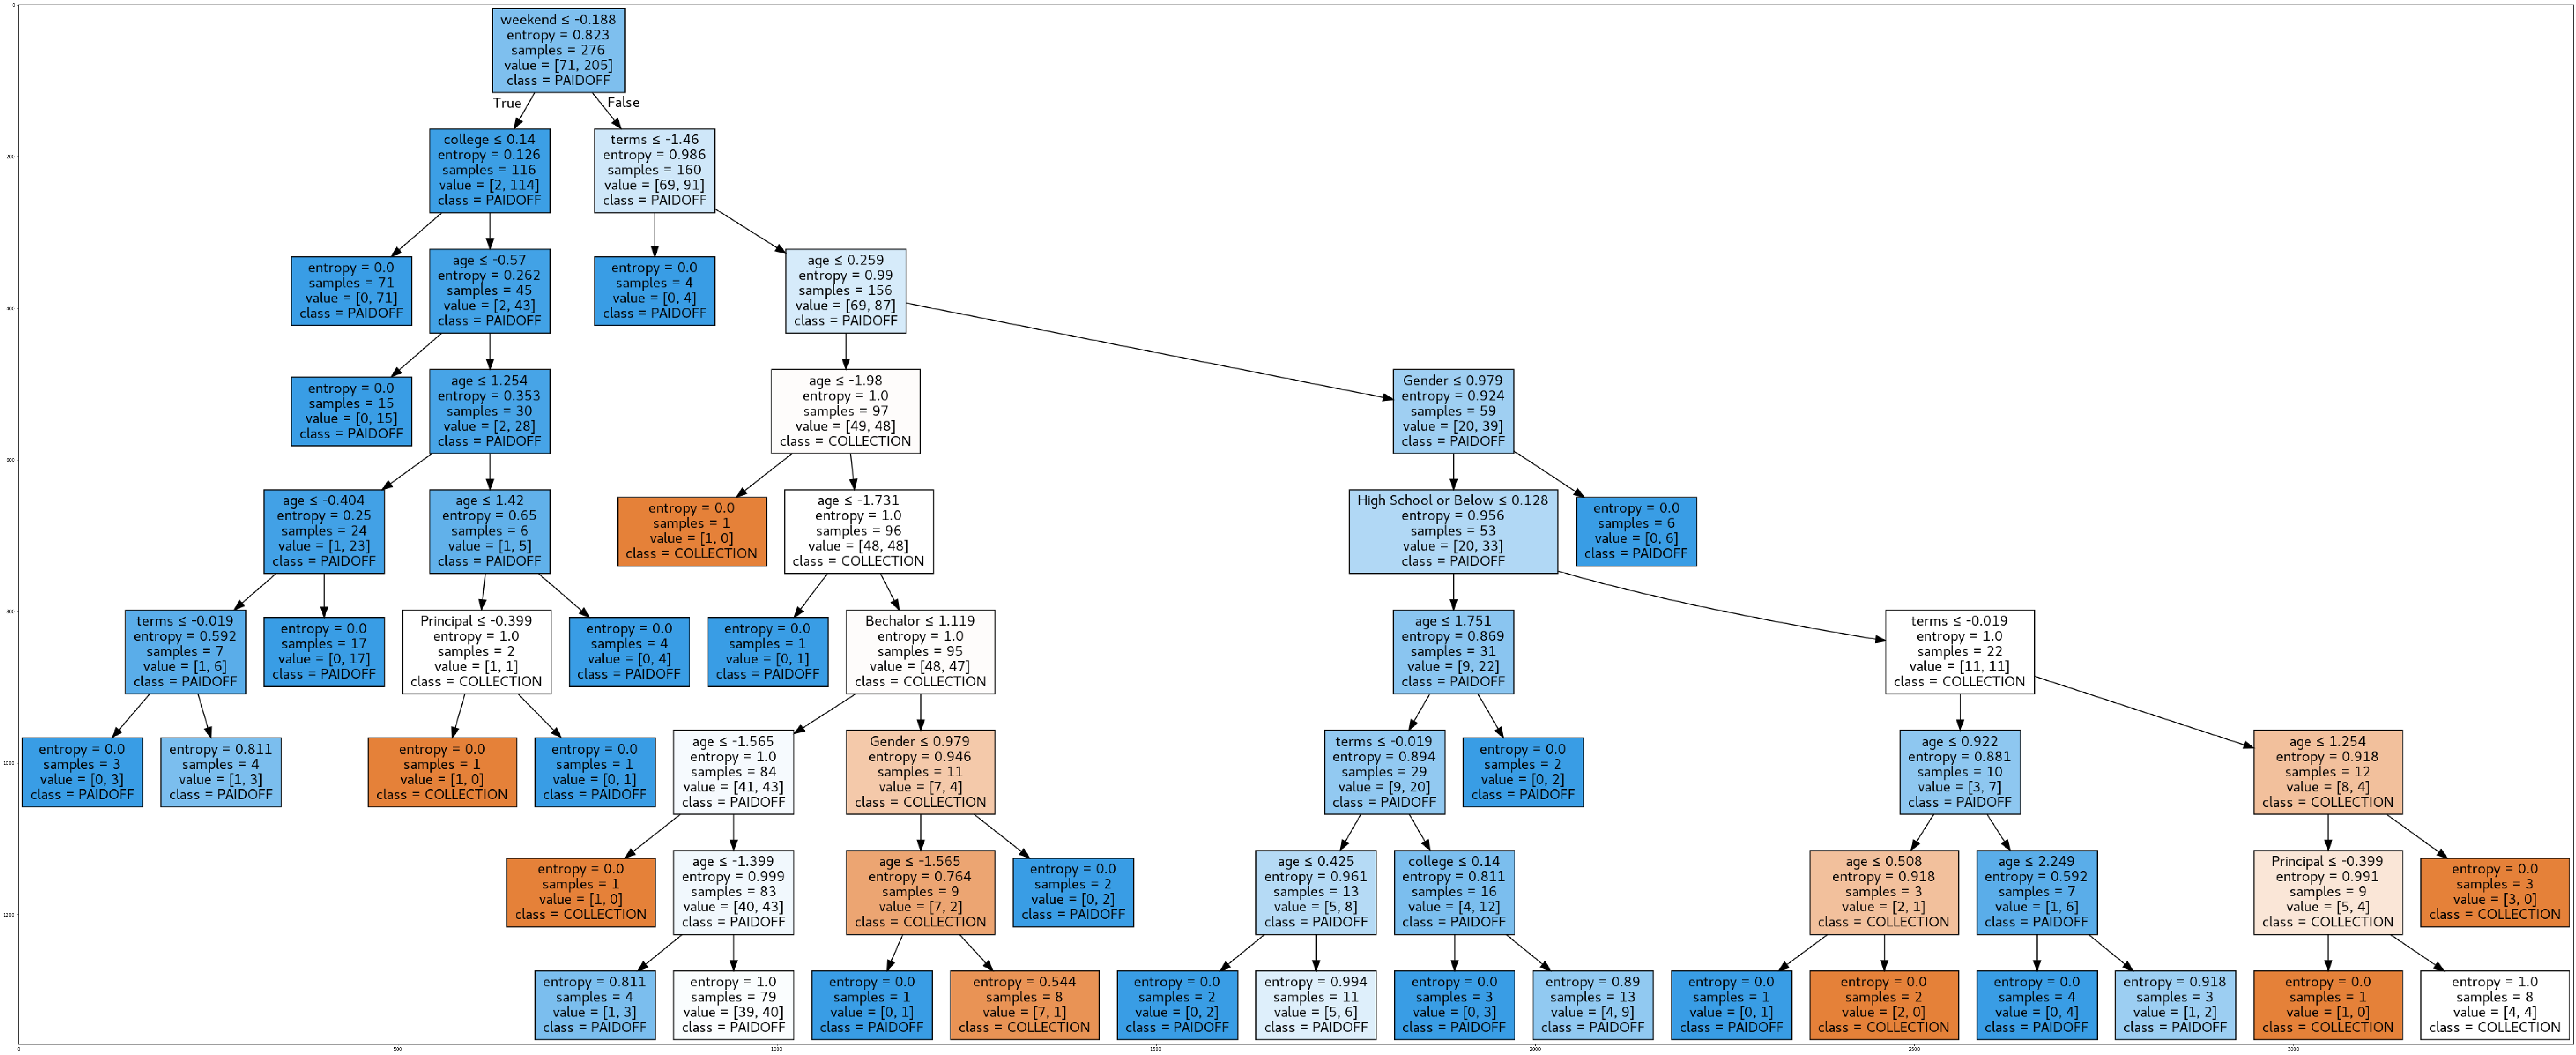

In [64]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(core,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine


In [83]:
from sklearn import svm

#Building a SVM classifier using a RBF Kernel
yelp1 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat4 = yelp1.predict(X_test)
#Evaluating the accuracy of the RBF kernel
svm_1 = metrics.accuracy_score(y_test, yhat4)

#Building a SVM classifier using a Linear Kernel
yelp2 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat5 = yelp2.predict(X_test)
#Evaluating the accuracy of the RBF kernel
svm_2 = metrics.accuracy_score(y_test, yhat5)

#Building a SVM classifier using a Polynomial Kernel
yelp3 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat6 = yelp3.predict(X_test)
#Evaluating the accuracy of the Polynomial kernel
svm_3 = metrics.accuracy_score(y_test, yhat6)

#Building a SVM classifier using a sigmoid Kernel
yelp4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat7 = yelp4.predict(X_test)
#Evaluating the accuracy of the Polynomial kernel
svm_4 = metrics.accuracy_score(y_test, yhat7)

print(svm_1,svm_2, svm_3,svm_4)

0.7428571428571429 0.7857142857142857 0.7714285714285715 0.7428571428571429


In [84]:
# We check for missing labels in the SVM models 
print("The missing label in the SVM model with the rbf kernel",set(y_test) - set(yhat4))
print("The missing label in the SVM model with the linear kernel",set(y_test) - set(yhat5))
print("The missing label in the SVM model with the linear kernel",set(y_test) - set(yhat6))
print("The missing label in the SVM model with the linear kernel",set(y_test) - set(yhat7))

The missing label in the SVM model with the rbf kernel set()
The missing label in the SVM model with the linear kernel {'COLLECTION'}
The missing label in the SVM model with the linear kernel set()
The missing label in the SVM model with the linear kernel set()


In [85]:
#The SVM with the Radial base function and sigmoid kernel have the same accuracy of 74.28%, 
# Build and train the SVM Classifier with the radial kernel

yelp = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

In [86]:
#Predicting the test values using the SVM model
yhat8 = yelp.predict(X_test)
yhat [0:6]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [87]:
print("Train set accuracy:", metrics.accuracy_score(y_train, yelp.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, yhat8))

print(classification_report(y_test,yhat8))   


Train set accuracy: 0.7101449275362319
Test set accuracy: 0.7428571428571429
              precision    recall  f1-score   support

  COLLECTION       0.20      0.07      0.10        15
     PAIDOFF       0.78      0.93      0.85        55

    accuracy                           0.74        70
   macro avg       0.49      0.50      0.48        70
weighted avg       0.66      0.74      0.69        70



In [88]:
#Calculate the f1_score
f1_score(y_test, yhat8, average='weighted')

0.6892857142857144

In [89]:
#Calculate the jaccard score
jaccard_score(y_test, yhat8, average='weighted')

0.5920235371036286

# Logistic Regression


In [90]:
from sklearn.linear_model import LogisticRegression

# Build and train the logestic regression model with solver=liblinear
flowlr1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat9 = flowlr1.predict(X_test)
mexlr_a1 = metrics.accuracy_score(y_test, yhat9)
print('The Logistic Regression model with liblinear solver =', mexlr_a1)

# Build and train the logestic regression model with solver=sag
flowlr2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat10 = flowlr2.predict(X_test)
mexlr_a2 = metrics.accuracy_score(y_test, yhat10)
print('The Logistic Regression model with sag solver =', mexlr_a2)

# Build and train the logestic regression model with solver=saga
flowlr3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat11 = flowlr3.predict(X_test)
mexlr_a3 = metrics.accuracy_score(y_test, yhat11)
print('The Logistic Regression model with saga solver =', mexlr_a3)

# Build and train the logestic regression model with solver=newton-cg
flowlr4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat12 = flowlr4.predict(X_test)
mexlr_a4 = metrics.accuracy_score(y_test, yhat12)
print('The Logistic Regression model with newton-cg solver =', mexlr_a4)

# Build and train the logestic regression model with solver=lbfgs
flowlr5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat13 = flowlr5.predict(X_test)
mexlr_a5 = metrics.accuracy_score(y_test, yhat13)
print('The Logistic Regression model with lbfgs solver =', mexlr_a5)

The Logistic Regression model with liblinear solver = 0.6857142857142857
The Logistic Regression model with sag solver = 0.7857142857142857
The Logistic Regression model with saga solver = 0.7857142857142857
The Logistic Regression model with newton-cg solver = 0.7857142857142857
The Logistic Regression model with lbfgs solver = 0.7857142857142857


In [91]:
# To Check if there are missing labels in the models 
print("Missing label in the Logisitic Regression model with liblinear solver",set(y_test) - set(yhat9))
print("Missing label in the Logistic Regression model with sag solver",set(y_test) - set(yhat10))
print("Missing label in the Logistic Regression model with saga solver",set(y_test) - set(yhat11))
print("Missing label in the Logistic Regression model with newton-cg solver",set(y_test) - set(yhat12))
print("Missing label in the Logistic Regression model with lbfgs solver",set(y_test) - set(yhat13))

Missing label in the Logisitic Regression model with liblinear solver set()
Missing label in the Logistic Regression model with sag solver {'COLLECTION'}
Missing label in the Logistic Regression model with saga solver {'COLLECTION'}
Missing label in the Logistic Regression model with newton-cg solver {'COLLECTION'}
Missing label in the Logistic Regression model with lbfgs solver {'COLLECTION'}


In [92]:
#Every model skipped the "collection" label from the predicted values except the liblinear model
#Hence, the best logistic classifier will be the one with a liblinear solver
flowlr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat14 = flowlr.predict(X_test)
print("Train set accuracy", metrics.accuracy_score(y_train, flowlr.predict(X_train)))
print("Test set accuracy", metrics.accuracy_score(y_test, yhat14))
print(classification_report(y_test, yhat14))



Train set accuracy 0.7572463768115942
Test set accuracy 0.6857142857142857
              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [93]:
#Calculate the f1_score
f1_score(y_test, yhat14, average='weighted')


0.6670522459996144

In [94]:
#calculate the jaccard score
jaccard_score(y_test, yhat14, average='weighted')

0.5493697478991597

# Model Evaluation using Test set


In [95]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [96]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-02-24 22:38:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-02-24 22:38:37 (46.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [97]:
test_df = pd.read_csv('loan_test.csv')
test_df[0:8]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male


In [98]:
#Let's get the shape of our test dataset
test_df.shape

(54, 10)

In [99]:
#Count of the loan status
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [100]:
df = test_df

#Convert to datetime object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

#Looking at the days of the week when loans are given
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#Convert categorical variables to numerical variables
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature

y_test = df['loan_status'].values

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [112]:
# Predictions For the KNN model testing
yh_knn = menard.predict(X_test)

# Calculate the f1 score
f1_knn = f1_score(y_test, yh_knn, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_knn = jaccard_score(y_test, yh_knn, average='weighted')

print('f1 score: ',f1_knn)
print('Jaccard index: ',jsc_knn)

f1 score:  0.6886205279919816
Jaccard index:  0.5460279119699409


In [113]:
# Predictions for the Decision tree model
yh_dt= core.predict(X_test)

# Calculate the f1 score
f1_dt = f1_score(y_test, yh_dt, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_dt = jaccard_score(y_test, yh_dt, average='weighted')

print('f1 score: ',f1_dt)
print('Jaccard index: ',jsc_dt)

f1 score:  0.7006734006734008
Jaccard index:  0.5831517792302107


In [114]:
# Predict using the svm model
yh_svm = yelp.predict(X_test)

# Calculate the f1 score
f1_svm = f1_score(y_test, yh_svm, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_svm = jaccard_score(y_test, yh_svm, average='weighted')

print('f1 score: ',f1_svm)
print('Jaccard index: ',jsc_svm)

f1 score:  0.6378600823045267
Jaccard index:  0.5323714391416944


In [115]:
# Predict using the logictic regression model
yh_lr = flowlr.predict(X_test)

# Calculate the f1 score
f1_lr = f1_score(y_test, yh_lr, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_lr = jaccard_score(y_test, yh_lr, average='weighted')

# Calculate Log loss
yhat_lr_prob = flowlr.predict_proba(X_test)
ll_lr = log_loss(y_test, yhat_lr_prob)


print('f1 score: ',f1_lr)
print('Jaccard index: ',jsc_lr)
print('Log Loss: ',ll_lr)

f1 score:  0.6604267310789049
Jaccard index:  0.5623573258793384
Log Loss:  0.5672153379912981


In [116]:
Jaccard = [jsc_knn,jsc_dt,jsc_svm,jsc_lr]
F1_score = [f1_knn,f1_dt,f1_svm,f1_lr]
LogLoss = ['NA','NA','NA',ll_lr]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.546028,0.688621,NA
1,Decistion Tree,0.583152,0.700673,NA
2,SVM,0.532371,0.637860,NA
3,LogisticRegression,0.562357,0.660427,0.567215


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
